tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

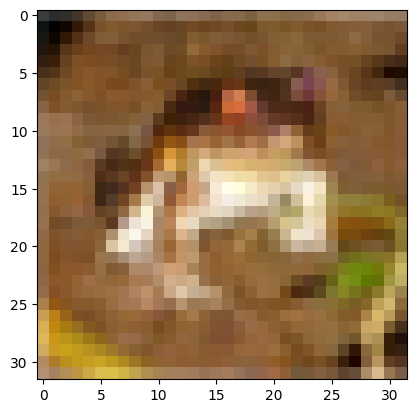

In [23]:
'''
- Take a pretrained network
- freeze its layers
- take a picture
'''

import torch
from torchvision.models import resnet18, ResNet18_Weights
from torch import nn, optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.5, 0.5, 0.5),
        (0.5, 0.5, 0.5)
    )
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
# train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4,shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

frog_img = train_loader.dataset[0][0]
print(frog_img)
plt.imshow(frog_img.permute(1, 2, 0) / 2 + 0.5)

In [47]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.eval()

# for layer in model.named_parameters():
#     print(layer)

# Freeze all the parameters in the network
# for param in model.parameters():
#     param.requires_grad = False

# iterable_of_tensors = [frog_img[i] for i in range(frog_img.size(0))]
# print(iterable_of_tensors)
input = frog_img.unsqueeze(0)

# Optimize only the classifier
# optimizer = optim.SGD(iterable_of_tensors, lr=1e-2, momentum=0.9)
# loss_function = nn.NLLLoss()
prediction = model(input)
print(prediction)

# print(frog_img.unsqueeze(0).size())

# epochs = 10
# for epoch in range(epochs):
    # inp, label = frog_img.unsqueeze(0), train_loader.dataset[0][1]
    # output = model(inp)
#     loss = loss_function(output, label)
#     loss.backward()
    # optimizer.step()
    # print

    # running_loss = 0.0
    # for i, data in enumerate(train_loader):
    #     inputs, labels = data[0].to(device), data[1].to(device)

    #     optimizer.zero_grad()
    #     outputs = net(inputs)
    #     loss = loss_function(outputs, labels)

    #     loss.backward()
    #     optimizer.step()

    #     running_loss += loss.item()
    #     if i % 2000 == 1999:
    #         print(f'[{epoch + 1}/{epochs}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
    #         running_loss = 0.0

# print('Finished Training')

tensor([[ 2.8129e+00,  2.9876e+00, -1.6044e+00, -3.6717e-01,  3.6305e-01,
          5.0948e+00,  3.5716e+00,  2.9630e-01,  1.5929e+00,  1.2199e+00,
          1.5298e+00,  5.3158e-01,  2.1195e+00,  1.8246e+00,  6.4136e-01,
          2.3881e+00,  1.1319e+00,  8.8039e-01,  1.1997e+00,  4.8234e-01,
          4.1654e+00,  1.6236e+00,  7.1886e-01,  1.3244e+00, -4.1175e-01,
          4.1992e+00,  5.6668e+00,  3.1053e+00,  3.6370e+00,  3.0539e+00,
          9.0189e+00,  1.4611e+00,  7.2345e+00,  4.8271e+00,  3.2421e+00,
          6.1281e+00,  6.4728e+00,  4.4460e+00,  1.5659e+00,  3.6808e+00,
          1.6109e+00,  4.0081e+00,  2.7262e+00,  2.9170e+00,  3.9306e+00,
          3.2480e+00,  3.9567e-01,  1.3377e+00,  2.7877e+00,  4.0647e+00,
          4.2337e+00, -1.1604e+00,  3.5567e+00,  3.1824e+00,  4.3495e+00,
          8.8922e-01,  2.4446e+00,  4.9079e+00,  7.7794e+00,  1.5629e+00,
          3.7431e+00,  4.2688e+00,  4.0825e+00,  3.5826e+00,  2.1962e+00,
          5.0319e+00,  3.6678e+00,  4.